# <html><head>Matplotlib</head></html>
<html><h4>suryadatascience1921@gmail.com</h4></html>
<html><h5>Jayasurya V</h5></html>

### 1.We have the min and max temperatures in a city In India for each months of the year.We would like to find a function to describe this and show it graphically, the dataset given below.

# <html><h5>Task:<br>
1.fitting it to the periodic function<br>
2.plot the fit<br>
Data<br>
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25<br>
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18</h5></html>

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [52]:
Max =np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min =np.array([ 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months=np.arange(12)

In [53]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      Max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      Min, [-40, 20, 0])

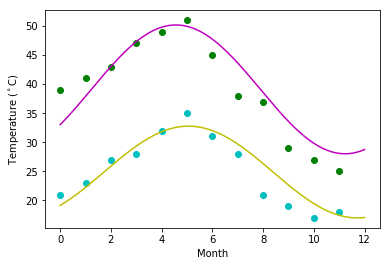

In [54]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, Min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

### 2.Charts to plot:
1.Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [55]:
data=pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

In [56]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Create a pie chart presenting the male/female proportion

([<matplotlib.patches.Wedge at 0x1d5cb709a20>,
 [Text(-0.480837,0.989341,'male'), Text(0.480837,-0.989341,'female')],
 [Text(-0.262275,0.539641,'64.4%'), Text(0.262275,-0.539641,'35.6%')])

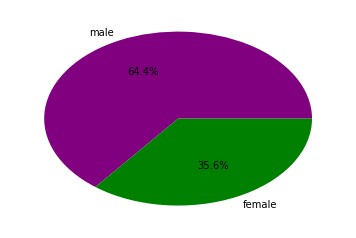

In [59]:
labels=['male','female']
sizes=data.sex.value_counts()
fig,ax1=plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%',colors=['purple','green'])

### Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

<Figure size 432x288 with 0 Axes>

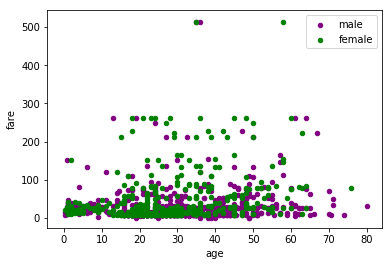

In [60]:
plt.figure()
cate=data[data.sex=='male'].plot.scatter('age','fare',color='purple',label='male')
data[data.sex=='female'].plot.scatter('age','fare',color='green',label='female',ax=cate)